In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r'C:\Users\RAJAT SINGH\Downloads\individual_stocks_5yr-20221210T203840Z-001\individual_stocks_5yr'

In [3]:
company_list=['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

In [4]:
full_df=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+'/'+file, error_bad_lines=False)
    
    full_df=pd.concat([full_df, current_df])

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_11920\1014201643.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file, error_bad_lines=False)
C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_11920\1014201643.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file, error_bad_lines=False)
C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_11920\1014201643.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file, error_bad_lines=False)
C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_11920\1014201643.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future versio

In [5]:
full_df.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


In [7]:
from datetime import datetime

In [8]:
full_df['date']=pd.to_datetime(full_df['date'])

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.0+ KB


In [10]:
tech_list=full_df['Name'].unique()

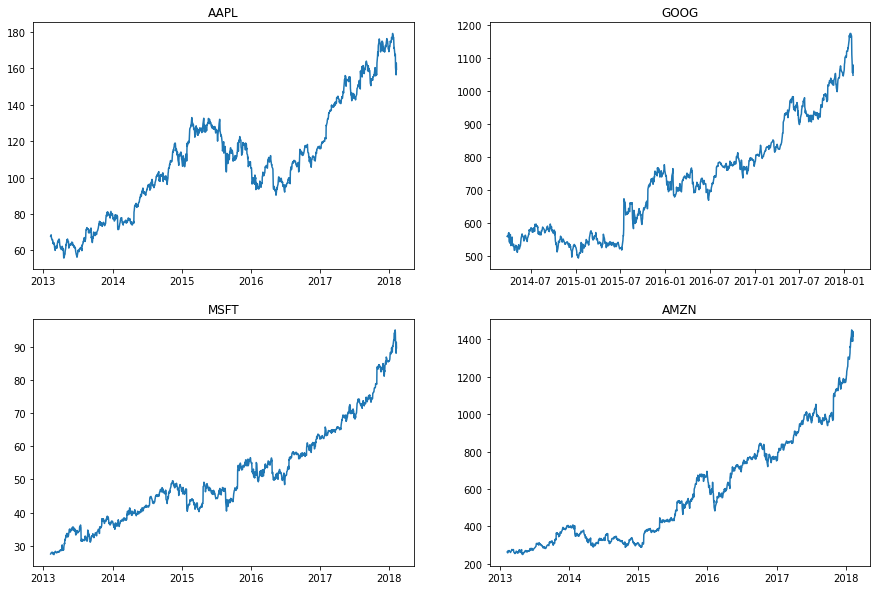

In [11]:
plt.figure(figsize=(15,10))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2,2,i)
    df=full_df[full_df['Name']==company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

## TOTAL NO OF VOLUME TRADED EACH DAY

In [12]:
import plotly.express as px

In [13]:
for company in tech_list:
    df=full_df[full_df['Name']==company]
    fig=px.line(df, x='date', y='volume', title=company)
    fig.show()
    

## ANALYSIS OF DAILY PRICE CHANGE IN STOCK

In [14]:
full_df['change_rate']=(full_df['close']-full_df['open'])

In [15]:
df['%change']=((df['close']-df['open'])/df['close'])*100

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_11920\2481340583.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df

date     open     high       low    close    volume  Name   %change
0    2013-02-08   261.40   265.25   260.555   261.95   3879078  AMZN  0.209964
1    2013-02-11   263.20   263.25   256.600   257.21   3403403  AMZN -2.328836
2    2013-02-12   259.19   260.16   257.000   258.70   2938660  AMZN -0.189409
3    2013-02-13   261.53   269.96   260.300   269.47   5292996  AMZN  2.946525
4    2013-02-14   267.37   270.65   265.400   269.24   3462780  AMZN  0.694548
...         ...      ...      ...       ...      ...       ...   ...       ...
1254 2018-02-01  1445.00  1459.88  1385.140  1390.00   9113808  AMZN -3.956835
1255 2018-02-02  1477.39  1498.00  1414.000  1429.95  11125722  AMZN -3.317599
1256 2018-02-05  1402.62  1458.98  1320.720  1390.00  11494985  AMZN -0.907914
1257 2018-02-06  1361.46  1443.99  1351.790  1442.84  11066819  AMZN  5.640265
1258 2018-02-07  1449.00  1460.99  1415.150  1416.78   7162741  AMZN -2.274171

[1259 rows x 8 columns]

In [17]:
for company in tech_list:
    fig=px.line(df, x='date', y='%change', title=company)
    fig.show()

## ANALYSIS OF MONTHLY MEAN OF CLOSE FEATURE

In [18]:
df2=df.copy()

In [19]:
df2['month']=df2['date'].dt.month

In [20]:
df2.head(20)

date    open     high      low   close   volume  Name   %change  \
0  2013-02-08  261.40  265.250  260.555  261.95  3879078  AMZN  0.209964   
1  2013-02-11  263.20  263.250  256.600  257.21  3403403  AMZN -2.328836   
2  2013-02-12  259.19  260.160  257.000  258.70  2938660  AMZN -0.189409   
3  2013-02-13  261.53  269.960  260.300  269.47  5292996  AMZN  2.946525   
4  2013-02-14  267.37  270.650  265.400  269.24  3462780  AMZN  0.694548   
5  2013-02-15  267.63  268.920  263.110  265.09  3979832  AMZN -0.958165   
6  2013-02-19  265.91  270.110  264.500  269.75  2853752  AMZN  1.423540   
7  2013-02-20  270.20  274.300  266.371  266.41  3528862  AMZN -1.422619   
8  2013-02-21  265.12  269.480  263.250  265.94  3637396  AMZN  0.308340   
9  2013-02-22  266.62  267.110  261.610  265.42  3123402  AMZN -0.452114   
10 2013-02-25  266.94  268.694  259.650  259.87  3032109  AMZN -2.720591   
11 2013-02-26  260.89  262.040  255.730  259.36  3348011  AMZN -0.589914   
12 2013-02-27  259.40  265.830  256.860  263.25  2908010  AMZN  1.462488   
13 2013-02-28  261.81  267.000  260.630  264.27  2667199  AMZN  0.930866   
14 2013-03-01  263.27  266.600  261.040  265.74  2956724  AMZN  0.929480   
15 2013-03-04  265.36  273.300  264.140  273.11  3452783  AMZN  2.837684   
16 2013-03-05  274.00  276.680  269.990  275.59  3685983  AMZN  0.576944   
17 2013-03-06  275.76  276.489  271.832  273.79  2050452  AMZN -0.719530   
18 2013-03-07  274.10  274.800  271.850  273.88  1938987  AMZN -0.080327   
19 2013-03-08  275.00  275.440  271.500  274.19  1879762  AMZN -0.295416   

    month  
0       2  
1       2  
2       2  
3       2  
4       2  
5       2  
6       2  
7       2  
8       2  
9       2  
10      2  
11      2  
12      2  
13      2  
14      3  
15      3  
16      3  
17      3  
18      3  
19      3

In [21]:
df2.dtypes

date       datetime64[ns]
open              float64
high              float64
low               float64
close             float64
volume              int64
Name               object
%change           float64
month               int64
dtype: object

In [22]:
df2.set_index('date', inplace=True)

In [23]:
df2.head()

open    high      low   close   volume  Name   %change  month
date                                                                       
2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN  0.209964      2
2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN -2.328836      2
2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN -0.189409      2
2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN  2.946525      2
2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN  0.694548      2

In [24]:
df2['close'].resample('M').mean()

date
2013-02-28     263.995000
2013-03-31     265.758400
2013-04-30     263.072364
2013-05-31     262.727727
2013-06-30     274.101900
                 ...     
2017-10-31    1000.720000
2017-11-30    1139.808095
2017-12-31    1168.841500
2018-01-31    1309.010952
2018-02-28    1413.914000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

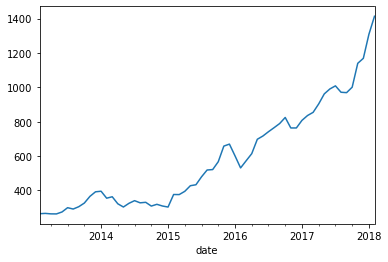

In [25]:
df2['close'].resample('M').mean().plot()

In [26]:
df2['close'].resample('Y').mean()

date
2013-12-31     301.564912
2014-12-31     332.550976
2015-12-31     478.138194
2016-12-31     699.523135
2017-12-31     968.151394
2018-12-31    1329.184615
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

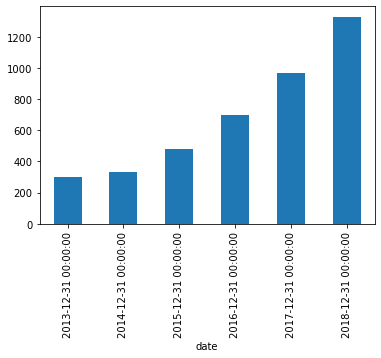

In [27]:
df2['close'].resample('Y').mean().plot(kind='bar')

## PERFORMING MULTI-VARIATE ANALYSIS

#### STOCK PROCES OF THESE COMPANIES ARE CORELATED OR NOT? (GOOGLE, MICROSOFT, AMAZON, APPLE)

In [28]:
df.head()

date    open    high      low   close   volume  Name   %change
0 2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN  0.209964
1 2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN -2.328836
2 2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN -0.189409
3 2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN  2.946525
4 2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN  0.694548

In [29]:
aapl=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//AAPL_data.csv')

In [30]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [31]:
amzn=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//AMZN_data.csv')

In [32]:
msft=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//MSFT_data.csv')

In [33]:
goog=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//GOOG_data.csv')

In [34]:
close=pd.DataFrame()

In [35]:
close['aapl']=aapl['close']
close['amzn']=amzn['close']
close['goog']=goog['close']
close['msft']=msft['close']

In [36]:
close.head()

aapl    amzn    goog   msft
0  67.8542  261.95  558.46  27.55
1  68.5614  257.21  559.99  27.86
2  66.8428  258.70  556.97  27.88
3  66.7156  269.47  567.16  28.03
4  66.6556  269.24  567.00  28.04

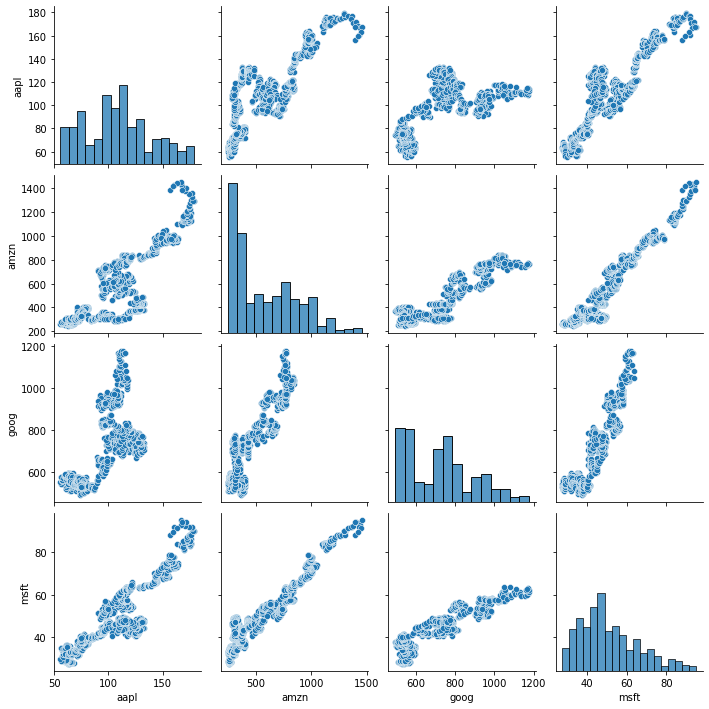

In [37]:
sns.pairplot(data=close)

<AxesSubplot:>

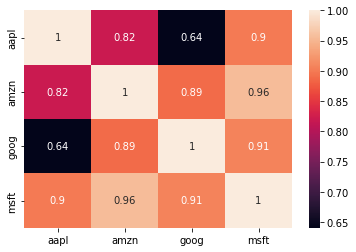

In [38]:
sns.heatmap(close.corr(), annot=True)

In [39]:
afl=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//AFL_data.csv')

In [40]:
aig=pd.read_csv('C://Users//RAJAT SINGH//Downloads//individual_stocks_5yr-20221210T203840Z-001//individual_stocks_5yr//AIG_data.csv')

In [41]:
aig.head()

date   open   high    low  close    volume Name
0  2013-02-08  38.76  39.03  38.51  38.79  13112320  AIG
1  2013-02-11  38.89  39.56  38.65  39.45  14230893  AIG
2  2013-02-12  39.50  39.90  38.50  38.63  25676629  AIG
3  2013-02-13  38.93  39.18  38.56  38.87  16533791  AIG
4  2013-02-14  38.64  39.26  38.50  39.21  18321181  AIG

In [42]:
afl.head()

date   open   high      low  close   volume Name
0  2013-02-08  50.38  50.50  50.0800  50.35  4175138  AFL
1  2013-02-11  50.36  50.39  50.1100  50.26  3321756  AFL
2  2013-02-12  50.11  50.22  49.4200  49.50  7704847  AFL
3  2013-02-13  49.43  49.54  48.4900  48.65  6063028  AFL
4  2013-02-14  48.43  48.93  48.1724  48.83  4984415  AFL

In [43]:
close['aig']=aig['close']
close['afl']=afl['close']

In [44]:
close.head()

aapl    amzn    goog   msft    aig    afl
0  67.8542  261.95  558.46  27.55  38.79  50.35
1  68.5614  257.21  559.99  27.86  39.45  50.26
2  66.8428  258.70  556.97  27.88  38.63  49.50
3  66.7156  269.47  567.16  28.03  38.87  48.65
4  66.6556  269.24  567.00  28.04  39.21  48.83

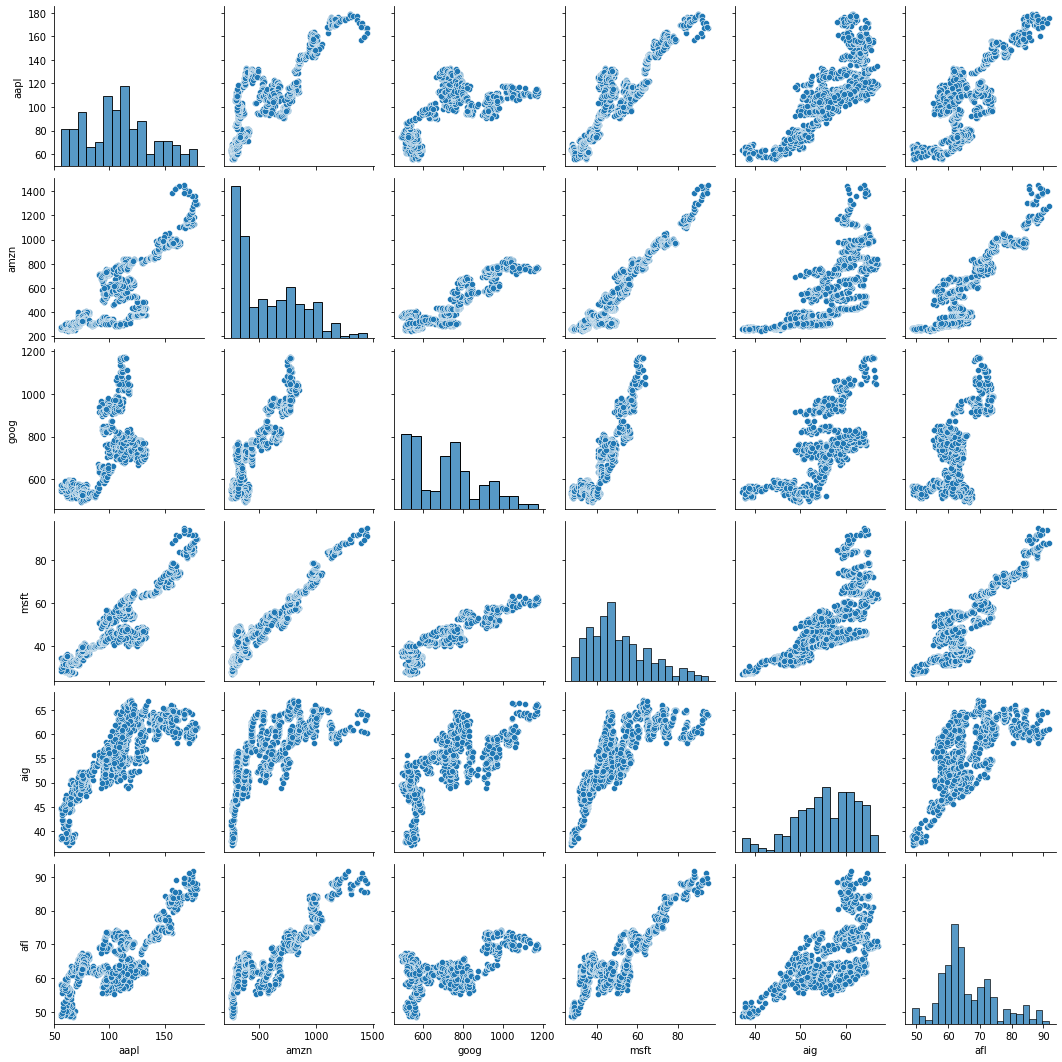

In [45]:
sns.pairplot(data=close)

<AxesSubplot:>

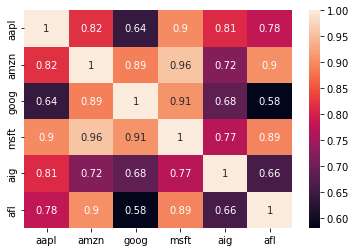

In [46]:
sns.heatmap(close.corr(), annot=True)

#### DAILY RETURN OF EACH STOCK

In [47]:
data=pd.DataFrame() #creating a dataframe

In [48]:
# Finding the daily return on each stock
data['aapl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [49]:
data.head()

aapl_change  goog_change  amzn_change  msft_change
0     0.206325    -1.708269     0.209964     0.725953
1     0.714688    -0.216075    -2.328836     0.753769
2    -2.481344    -1.781065    -0.189409     0.000000
3    -0.042869     1.489879     2.946525     0.356761
4     0.443624     0.334039     0.694548     0.427960

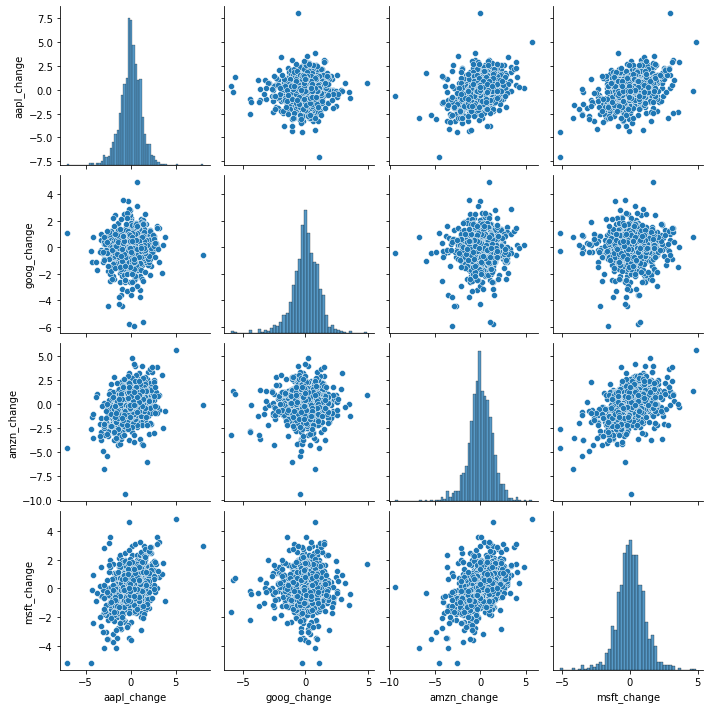

In [50]:
# plotting pairwise relationship between the variables in our dataset
sns.pairplot(data=data)

<AxesSubplot:>

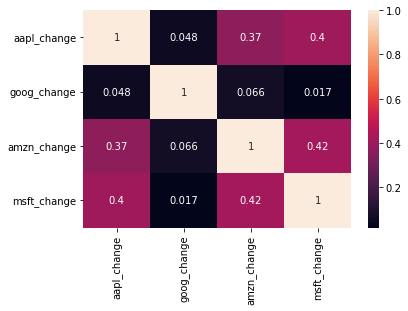

In [51]:
# Finding correlation 
sns.heatmap(data.corr(), annot=True)

#### VALUE AT RISK ANALYSIS FOR TECH COMPANIES

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='aapl_change', ylabel='Density'>

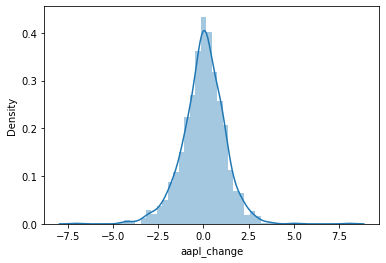

In [52]:
sns.distplot(data['aapl_change'])

In [53]:
data['aapl_change'].std()
# computing single standard deviation
# 68% of the entire data

1.1871377131421237

In [54]:
data['aapl_change'].std()*2
# computing double standard deviation
# 95% of the entire data

2.3742754262842474

In [55]:
data['aapl_change'].std()*3
# computing third standard deviation
# 99.7% of the entire data

3.561413139426371

In [56]:
data['aapl_change'].quantile(0.1)
# This shows 90% of the time my worst daily loss will not exceed -1.4246644227944307

-1.4246644227944307

In [57]:
data.describe().T

count      mean       std       min       25%       50%  \
aapl_change  1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
goog_change   975.0 -0.012495  1.092560 -5.952266 -0.551963  0.024951   
amzn_change  1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   
msft_change  1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   

                  75%       max  
aapl_change  0.715427  8.000388  
goog_change  0.672649  4.943550  
amzn_change  0.852568  5.640265  
msft_change  0.703264  4.861491

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='msft_change', ylabel='Density'>

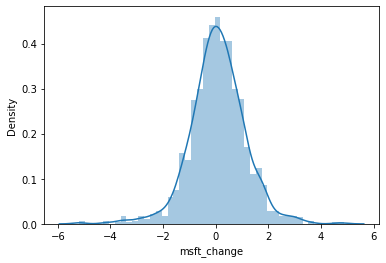

In [58]:
sns.distplot(data['msft_change'])

In [60]:
print(data['msft_change'].std())
print(data['msft_change'].std()*2)
print(data['msft_change'].std()*3)

1.059259601884536
2.118519203769072
3.177778805653608


In [61]:
data['msft_change'].quantile(0.1)
# This shows 90% of the time my worst daily loss in this stock will not exceed -1.1385681979964504

-1.1385681979964504

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='goog_change', ylabel='Density'>

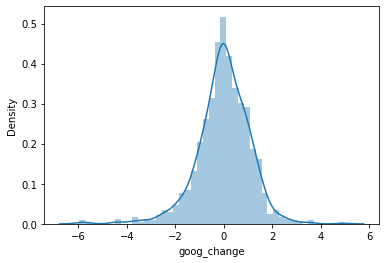

In [62]:
sns.distplot(data['goog_change'])

In [63]:
print(data['goog_change'].std())
print(data['goog_change'].std()*2)
print(data['goog_change'].std()*3)

1.0925596178210477
2.1851192356420954
3.277678853463143


In [64]:
data['goog_change'].quantile(0.1)
# This shows 90% of the time my worst daily loss in this stock will not exceed -1.2285255355035662

-1.2285255355035662